In [15]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Ring and solid ball rolling off a table edge

This post is about another problem from the physcs book by Yakovlev. You might be interested to check out my previous [post](http://guziy.blogspot.com/2019/01/superheroes-and-sticks.html) in this series which was also inspired by the same problem book.

Let's start with my interpretation of the **problem statement**. At the $t=0$ we have a ring rolling to the right towards table edge as shown in Fig. 1. The ring rolls without sliding. The table heigh above the ground is $H$ and the ring radius is $R$. We need to determine how far horizontally from the table edge the ring will land. And finally we have to show how the result will change if the ring is replaced by a solid ball.

**Solution**

Let's start by determining the rotation angle at which the interaction between the table and the ring (or a ball) becomes 0 (Fig. 2), i.e. at the moment of take-off. We will further refer to this angle as $\alpha$. From the second Newton's law applied to the projections of the forces on the line $OC$, we get: 

$$
    -N + mg\cos\alpha = m\frac{v^2}{R}
$$

where $N$ - is the force of reaction of the table on the ring, $m$ - mass of the ring, $v$ - the speed of the center of mass of the ring.

At the moment of take-off $N=0$, therefore:

\begin{equation}
mg\cos\alpha = m\frac{v^2}{R} \Rightarrow v^2 = gR\cos\alpha 
\end{equation}

We determine the speed of the ring at the moment of take-off from the energy conservation equation:

\begin{equation}
mg(R - R\cos\alpha) = I_O\frac{\omega^2}{2}
\end{equation}

where $I_O$ - is the moment of inertia of the object (i.e. ring or ball in our case) around the axis passing through the contact point (O) with the table.

No-slide condition $v=\omega R$ and (1), (2) give:

$$
mgR(1-\cos\alpha)=I_O\frac{v^2}{2R^2}=\frac{I_O}{2R^2}gR\cos\alpha \Rightarrow
$$

$$
\Rightarrow \cos\alpha = \frac{mgR}{mgR + \frac{I_OgR}{2R^2}} = \frac{1}{1 + \frac{I_O}{2mR^2}}
$$

Note that fora ring $I_O = 2mR^2 \Rightarrow \cos\alpha=1/2$. This would be the end of our solution if we were to consider the modified problem statement in a newer edition of the problem book.

Now to find the speed at the moment of take-off, we plug the expression for $\cos\alpha$ into (1) to get:

$$
    v^2 = gR\cos\alpha = \frac{gR}{1 + \frac{I_O}{2mR^2}} 
    \Rightarrow v = \left[ \frac{gR}{1 + \frac{I_O}{2mR^2}} \right]^{1/2}
$$

Let's now start calculating the horizontal distance travelled by the center of mass of our object from the table edge. It consists of 2 components:

$$
x = x_1 + x_2
$$

where $x_1$, $x_2$ are the distances travelled before and after the take-off, respectively.

From geometry considerations (see Fig. 2):

$$
x_1 = R\sin\alpha
$$

Then, since along the horizontal axis $F_x = 0$:

$$
v_x = {\rm const} = v\cos\alpha
$$

And therefore, the horizontal distance travelled by the object after take-off is 

\begin{equation}
x_2 = v_x t = v\cos\alpha\cdot t
\end{equation}

where $t$ is the time between take-off and landing of the object. 

The vertical distance travelled by the object since take-off:

$$
H - (R-R\cos\alpha) = v\sin\alpha \cdot t + \frac{gt^2}{2}
$$

Then, using (3), we get an equation with respect to $x2$:

$$
H - R(1 - \cos\alpha) = x_2\tan\alpha + \frac{g}{2} \frac{x_2^2}{v^2\cos^2\alpha}
$$


Solving the above equation for $x_2$ and selecting only positive root, we get:

$$
x_2 = \frac{v^2\sin\alpha\cos\alpha}{g}\left( -1 + \sqrt{1+ \frac{2g}{v^2\sin^2\alpha}(H-R+R\cos\alpha)} \right)
$$

Using $v^2 = gR\cos\alpha$:

$$
x_2 = R\cos^2\alpha\sin\alpha\left( -1 + \sqrt{\frac{2}{R\cos\alpha\sin^2\alpha}(H-R+R\cos\alpha) +1}\right)
$$

Therefore 

\begin{equation}
    x = x_1 + x_2 = 
    R\sin\alpha\left[ \sin^2\alpha + \cos^2\alpha \sqrt{1 + \frac{2(H-R+R\cos\alpha)}{R\cos\alpha\sin^2\alpha}}\: \right]
\end{equation}

The above is a general expression for the horizontal distance the object falls from the table edge. 

In case of the ring $\cos\alpha=1/2$, $\sin\alpha = \sqrt{3}/2$, and the expression for the distance is: 

$$
x = \frac{R}{8}\left( 3\sqrt{3} + \sqrt{\frac{16H}{R} - 5}\right)
$$

The above is the answer to the problem question for the case of a ring, it is the same as in the problem book. I could not quite get to it on my several attempts to solve the problem because I was forgetting to take into account the vertical distance travelled by the center of mass of the object before take-off. Due to this ommission, I was considering that it fell the complete height $H$ after take-off whereas in reality it is $H - (R-R\cos\alpha)$. And because of this my answer was slightly different from the one in the problem book. The discrepancy between my answer and the one in the book worried me to the point that I have decided to write my solution up in the hope of getting a comment from a curious reader... But I have discovered the ommission, when I was carefully writing the solution for this post, and fixed the problem.

Now let's try to answer the last part of the problem question, i.e. which object (ring or full ball) would fall further from the table edge. For this I was not able to analytically prove which one would be further for different $H/R$ ratios, so I decided to plot $\delta=x_{\rm ring} - x_{\rm ball}$ to see, maybe the answer would depend on it.

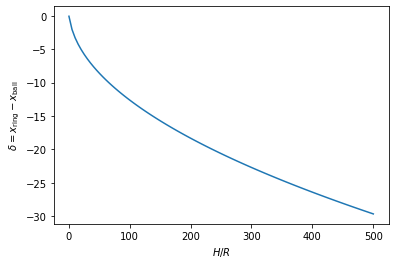

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def cosa(mI_factor):
    #mI_factor:
    # ring = 2, solid ball = 7/5 
    return 1. / (1. + mI_factor / 2.)

def sina(mI_factor):
    return (1 - cosa(mI_factor) ** 2) ** 0.5

def dist(ratio, mI_factor, R=1):
    ca = cosa(mI_factor)
    sa = sina(mI_factor)
    
    return R * sa * (sa ** 2 + ca ** 2 * (1 + 2 * (ratio - 1 + ca) / (ca * sa ** 2)) ** 0.5)


# dist(7/8, 2) - 3/8 * (3 ** 0.5 + 1)

def delta(ratio, R=1):
    # dist(ring) - dist(ball) for different ratios
    return dist(ratio, 2, R=R) - dist(ratio, 7. / 5., R=R) 

R = 10
r = np.linspace(6/16, 500, 100) # H/R
d = [delta(ri, R=R) for ri in r]

plt.plot(r, d)
plt.xlabel(r"$H/R$")
l = plt.ylabel(r"$\delta=x_{\rm ring} - x_{\rm ball}$")

From the graph above it is obvious that $\delta=x_{\rm ring} - x_{\rm ball} \leq 0$ for all $H/R$. Therefore, the horizontal distance to the table edge will be greater for the ball. Unfortunately, this is not the same answer as in the problem book, they state the inverse...